# Tutorial from [here](https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
os.chdir('/Users/prateepmukherjee/Documents/Projects/turi/notebooks')
print(os.getcwd())

/Users/prateepmukherjee/Documents/Projects/turi/notebooks


In [3]:
df = pd.read_csv("Boston_Housing_Prices.csv")

In [4]:
df.describe()

,tract,longitude,latitude,crime,residential,industrial,nox,rooms,older,distance,highway,tax,ptratio,lstat,cmedv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2700.355731,-71.056389,42.216440,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,1380.036830,0.075405,0.061777,8.601545,23.322453,6.860353,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,1.000000,-71.289497,42.029999,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,1303.250000,-71.093226,42.180774,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,3393.500000,-71.052902,42.218100,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200001
75%,3739.750000,-71.019625,42.252249,3.677083,12.500000,18.100000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,16.954999,25.000000
max,5082.000000,-70.809998,42.381000,88.976196,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970001,50.000000


In [5]:
df.corr()

,tract,longitude,latitude,crime,residential,industrial,nox,rooms,older,distance,highway,tax,ptratio,lstat,cmedv
tract,1.000000,-0.220890,-0.225543,-0.547165,0.367292,-0.575705,-0.569807,0.305207,-0.487465,0.496841,-0.828829,-0.793602,-0.532678,-0.522485,0.428252
longitude,-0.220890,1.000000,0.143055,0.065101,-0.218080,0.062702,0.160869,-0.257111,0.204736,-0.011241,0.034065,0.050661,0.312602,0.195629,-0.322947
latitude,-0.225543,0.143055,1.000000,-0.084294,-0.129668,-0.041093,-0.068600,-0.069317,0.079035,-0.082981,-0.207013,-0.167718,-0.004527,0.045660,0.006825
crime,-0.547165,0.065101,-0.084294,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.389582
residential,0.367292,-0.218080,-0.129668,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360386
industrial,-0.575705,0.062702,-0.041093,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.484754
nox,-0.569807,0.160869,-0.068600,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.429300
rooms,0.305207,-0.257111,-0.069317,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,-0.613808,0.696304
older,-0.487465,0.204736,0.079035,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.377999
distance,0.496841,-0.011241,-0.082981,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249315


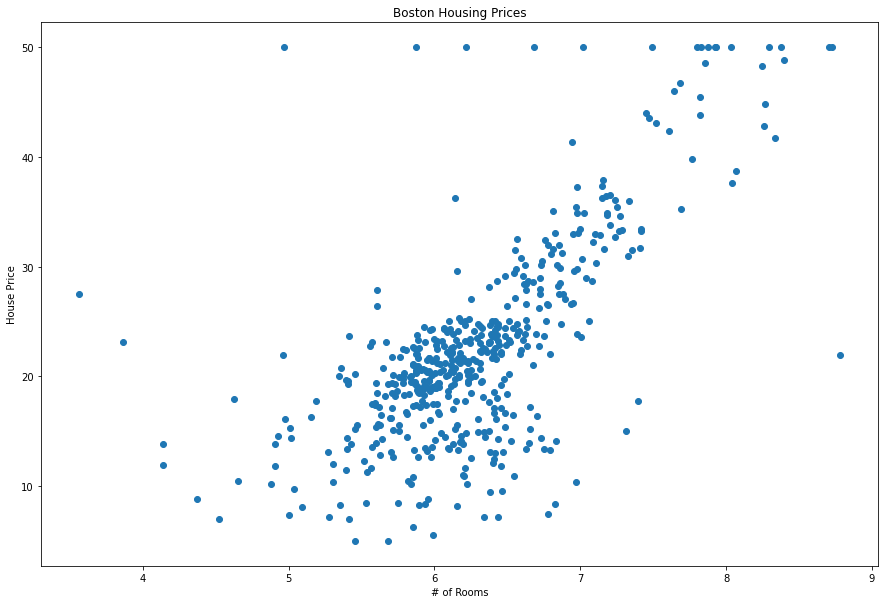

In [6]:
plt.figure(figsize=(15,10))
plt.scatter(x=df['rooms'], y=df['cmedv'])
plt.xlabel('# of Rooms')
plt.ylabel('House Price')
plt.title('Boston Housing Prices')
plt.show()

## Linear Regression

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = np.array(df['rooms']).reshape(-1,1)
y = np.array(df['cmedv']).reshape(-1,1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# print(y_train.shape)
y_train = y_train.reshape(len(y_train),)
y_test = y_test.reshape(len(y_test),)
# print(y_train.shape)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lm = LinearRegression()

In [12]:
lm.fit(X_train, y_train)

LinearRegression()

Intercept: -35.558
Coefficient: 9.232
MAE = $4,413.82


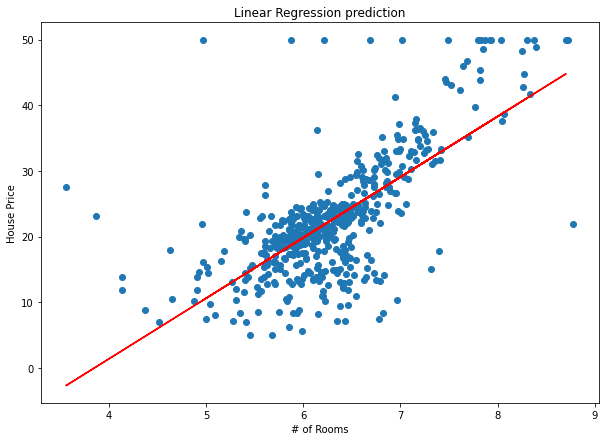

In [13]:
from sklearn.metrics import mean_absolute_error

print("Intercept: {:,.3f}".format(lm.intercept_))
print("Coefficient: {:,.3f}".format(lm.coef_[0]))

mae = mean_absolute_error(y_test, lm.predict(X_test))
print("MAE = ${:,.2f}".format(1000 * mae))

# Plot outputs
plt.figure(figsize=(10,7))
plt.scatter(x=df['rooms'], y=df['cmedv'])
plt.plot(X_test, lm.predict(X_test), color='red')
plt.xlabel('# of Rooms')
plt.ylabel('House Price')
plt.title('Linear Regression prediction')
plt.show()

## SVR

__Define performance results function__

In [14]:
def svr_results(y_test, X_test, model):
    
    print("C: {}".format(model.C))
    print("Epsilon: {}".format(model.epsilon))
    
    print("Intercept: {:,.3f}".format(model.intercept_[0]))
    print("Coefficient: {:,.3f}".format(model.coef_[0]))
    
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print("MAE = ${:,.2f}".format(1000 * mae))
    
    perc_within_eps = 100 * np.sum(y_test - y_pred < eps) / len(y_test)
    print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))
    
    # Plot outputs
    plt.figure(figsize=(10,7))
    plt.scatter(x=df['rooms'], y=df['cmedv'])
    plt.plot(X_test, y_pred, color='red')
    plt.plot(X_test, y_pred+eps, color='black')
    plt.plot(X_test, y_pred-eps, color='black')
    plt.xlabel('# of Rooms')
    plt.ylabel('Housing prices')
    plt.title('SVR prediction')
    plt.show()

## Simple LinearSVR

In [15]:
from sklearn.svm import LinearSVR

In [16]:
eps = 5
svr = LinearSVR(epsilon=eps, C=0.01, fit_intercept=True)

In [17]:
svr.fit(X_train, y_train)

LinearSVR(C=0.01, epsilon=5)

C: 0.01
Epsilon: 5
Intercept: 0.368
Coefficient: 3.136
MAE = $5,781.76
Percentage within Epsilon = 74.51%


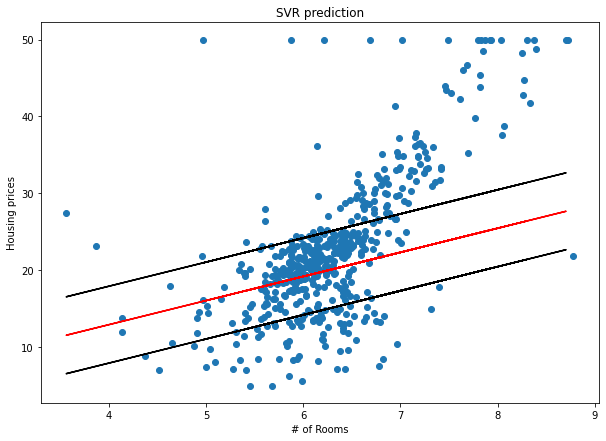

In [18]:
svr_results(y_test, X_test, svr)

## Larger Penalty (= Larger C)

In [19]:
eps = 5
svr_high_C = LinearSVR(epsilon=eps, C=1.0, fit_intercept=True)

In [20]:
svr_high_C.fit(X_train, y_train)

LinearSVR(epsilon=5)

C: 1.0
Epsilon: 5
Intercept: -10.096
Coefficient: 5.157
MAE = $4,826.16
Percentage within Epsilon = 81.37%


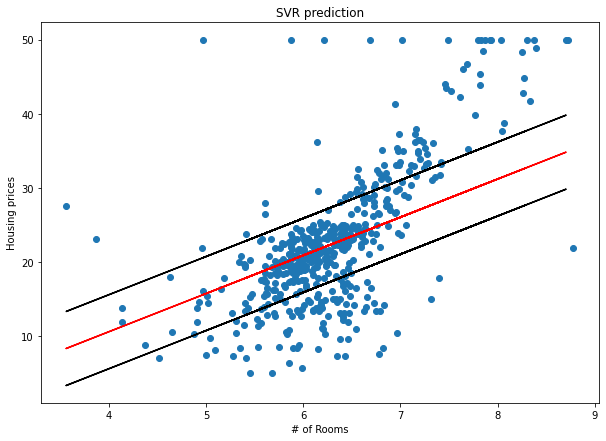

In [21]:
svr_results(y_test, X_test, svr_high_C)

More points are within our margin (epsilon), since we increased C to 1.0.

## Vary C

In [22]:
from sklearn.metrics import mean_absolute_error

In [23]:
test_mae_list = []
perc_within_eps_list = []

eps = 5
C_space = np.linspace(0.01, 10)

for C in C_space:
    varied_svr = LinearSVR(epsilon=eps, C=C, fit_intercept=True, max_iter=10000)
    
    varied_svr.fit(X_train, y_train)
    y_pred = varied_svr.predict(X_test)
    
    varied_mae = mean_absolute_error(y_test, y_pred)
    test_mae_list.append(varied_mae)
    
    varied_perc_within_eps = 100 * np.sum(y_test - y_pred < eps) / len(y_test)
    perc_within_eps_list.append(varied_perc_within_eps)

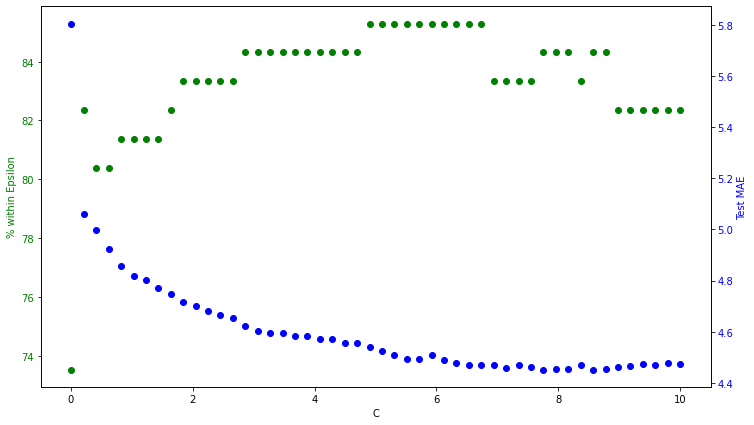

In [24]:
fig, ax1 = plt.subplots(figsize=(12,7))

color='green'
ax1.set_xlabel('C')
ax1.set_ylabel('% within Epsilon', color=color)
ax1.scatter(C_space, perc_within_eps_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

color='blue'
ax2 = ax1.twinx() # initiate a second axis that shares the same x-axis
ax2.set_ylabel('Test MAE', color=color)
ax2.scatter(C_space, test_mae_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

In [25]:
m = max(perc_within_eps_list)
inds = [i for i,j in enumerate(perc_within_eps_list) if j == m]
C = C_space[inds[0]]

print("best C = {}".format(C))

best C = 4.903061224489796


## Best C from GridSearch

C: 4.903061224489796
Epsilon: 5
Intercept: -25.659
Coefficient: 7.610
MAE = $4,542.74
Percentage within Epsilon = 84.31%


/Users/prateepmukherjee/Documents/Projects/turi/mjolnir-cli/venv/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


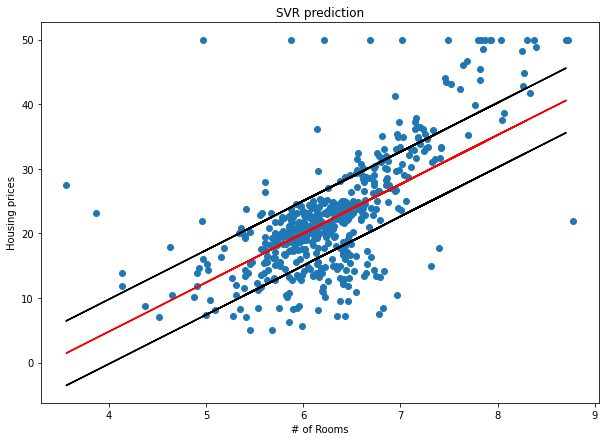

In [26]:
eps = 5
svr_best_C = LinearSVR(epsilon=eps, C=C, fit_intercept=True)
svr_best_C.fit(X_train, y_train)
svr_results(y_test, X_test, svr_best_C)

## Bonus: Grid Search over C and Epsilon

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [28]:
grid = {
    'C': np.linspace(0.01, 10),
    'epsilon': np.linspace(0.01, 10)
}

svr_gridsearch = LinearSVR(fit_intercept=True, max_iter=10000)

In [29]:
grid_svr = GridSearchCV(svr_gridsearch, grid, scoring='neg_mean_absolute_error', cv=5)

In [30]:
grid_svr.fit(X_train, y_train)

/Users/prateepmukherjee/Documents/Projects/turi/mjolnir-cli/venv/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, estimator=LinearSVR(max_iter=10000),
             param_grid={'C': array([ 0.01      ,  0.21387755,  0.4177551 ,  0.62163265,  0.8255102 ,
        1.02938776,  1.23326531,  1.43714286,  1.64102041,  1.84489796,
        2.04877551,  2.25265306,  2.45653061,  2.66040816,  2.86428571,
        3.06816327,  3.27204082,  3.47591837,  3.67979592,  3.88367347,
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.1069...
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.10693878,  5.31081633,  5.51469388,  5.71857143,  5.92244898,
        6.12632653,  6.33020408,  6.53408163,  6.73795918,  6.94183673,
        7.14571429,  7.34959184,  7.55346939,  7.75734694,  7.96122449,
        8.16510204,  8.36897959,  8.57285714,  8.77673469,  8.98061224,
        9.1844898 ,  9.38836735,  9.5922449 ,  9.79612245, 10.        ])},
             scoring='neg_mean_absolute_error')

In [31]:
best_grid_svr_mae = grid_svr.best_estimator_
best_grid_svr_mae.fit(X_train, y_train)

LinearSVR(C=9.796122448979592, epsilon=0.41775510204081634, max_iter=10000)

C: 9.796122448979592
Epsilon: 0.41775510204081634
Intercept: -34.237
Coefficient: 9.059
MAE = $4,411.80
Percentage within Epsilon = 87.25%


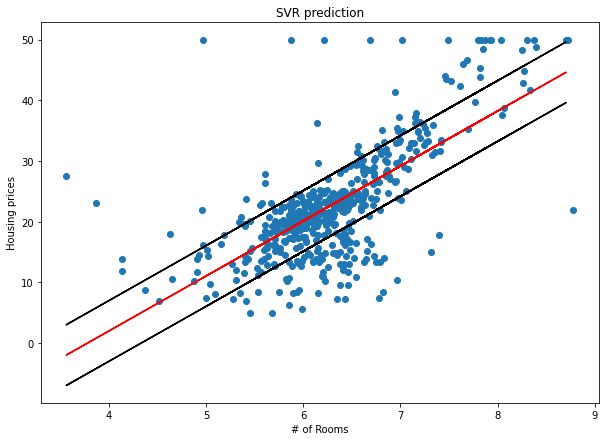

In [32]:
svr_results(y_test, X_test, best_grid_svr_mae)

## Scoring Criteria: % within Epsilon

In [33]:
grid = {
    'C': np.linspace(0.01, 10),
    'epsilon': np.linspace(0.01, 10)
}

svr_gridsearch = LinearSVR(fit_intercept=True, max_iter=10000)

In [34]:
from sklearn.metrics import make_scorer

In [35]:
def frac_within_eps(y_true, y_pred):
    return np.sum(abs(y_true - y_pred) <= eps) / len(y_true)

In [36]:
my_scorer = make_scorer(frac_within_eps, greater_is_better=True)

In [37]:
grid_svr_eps = GridSearchCV(svr_gridsearch, grid, scoring=my_scorer)

In [38]:
grid_svr_eps.fit(X_train, y_train)

/Users/prateepmukherjee/Documents/Projects/turi/mjolnir-cli/venv/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/prateepmukherjee/Documents/Projects/turi/mjolnir-cli/venv/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(estimator=LinearSVR(max_iter=10000),
             param_grid={'C': array([ 0.01      ,  0.21387755,  0.4177551 ,  0.62163265,  0.8255102 ,
        1.02938776,  1.23326531,  1.43714286,  1.64102041,  1.84489796,
        2.04877551,  2.25265306,  2.45653061,  2.66040816,  2.86428571,
        3.06816327,  3.27204082,  3.47591837,  3.67979592,  3.88367347,
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.10693878,...
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.10693878,  5.31081633,  5.51469388,  5.71857143,  5.92244898,
        6.12632653,  6.33020408,  6.53408163,  6.73795918,  6.94183673,
        7.14571429,  7.34959184,  7.55346939,  7.75734694,  7.96122449,
        8.16510204,  8.36897959,  8.57285714,  8.77673469,  8.98061224,
        9.1844898 ,  9.38836735,  9.5922449 ,  9.79612245, 10.        ])},
             scoring=make_scorer(frac_within_eps))

In [39]:
best_grid_svr_eps = grid_svr_eps.best_estimator_

In [40]:
best_grid_svr_eps.fit(X_train, y_train)

LinearSVR(C=7.961224489795918, epsilon=1.437142857142857, max_iter=10000)

C: 7.961224489795918
Epsilon: 1.437142857142857
Intercept: -33.491
Coefficient: 8.952
MAE = $4,414.05
Percentage within Epsilon = 88.24%


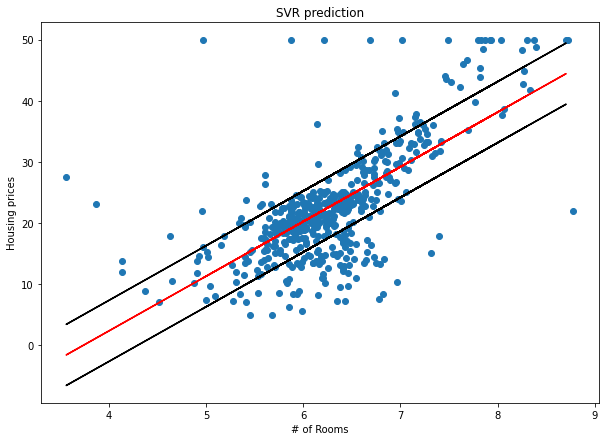

In [41]:
svr_results(y_test, X_test, best_grid_svr_eps)